In [ ]:
!pip install spacy

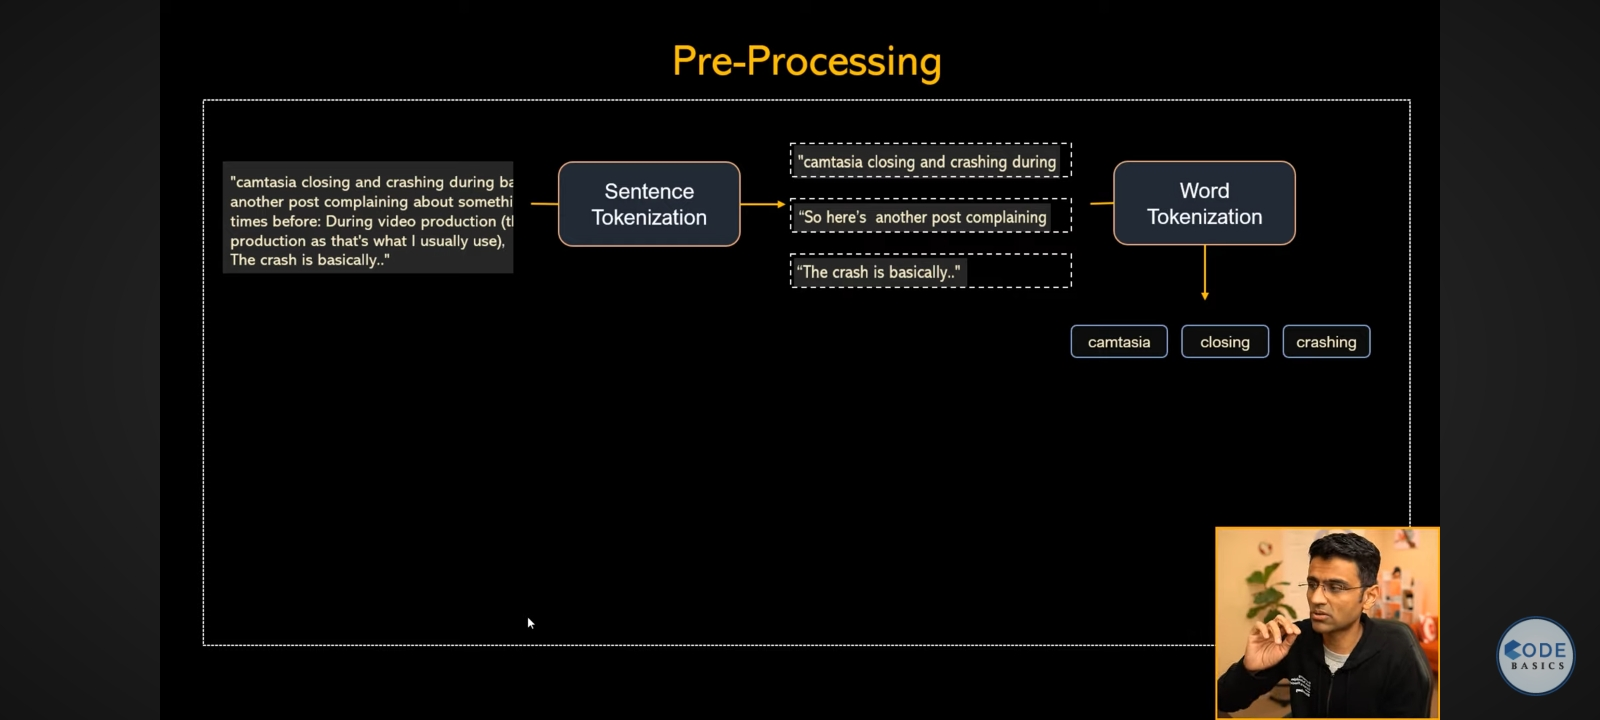

In [ ]:
import spacy

In [ ]:
# Creating a english language object.
nlp = spacy.blank('en')

doc = nlp("Dr. Strange loves pav bhaji of mumbai as it costs only 2$ per plate.")

for token in doc:
  print(token)

Dr.
Strange
loves
pav
bhaji
of
mumbai
as
it
costs
only
2
$
per
plate
.


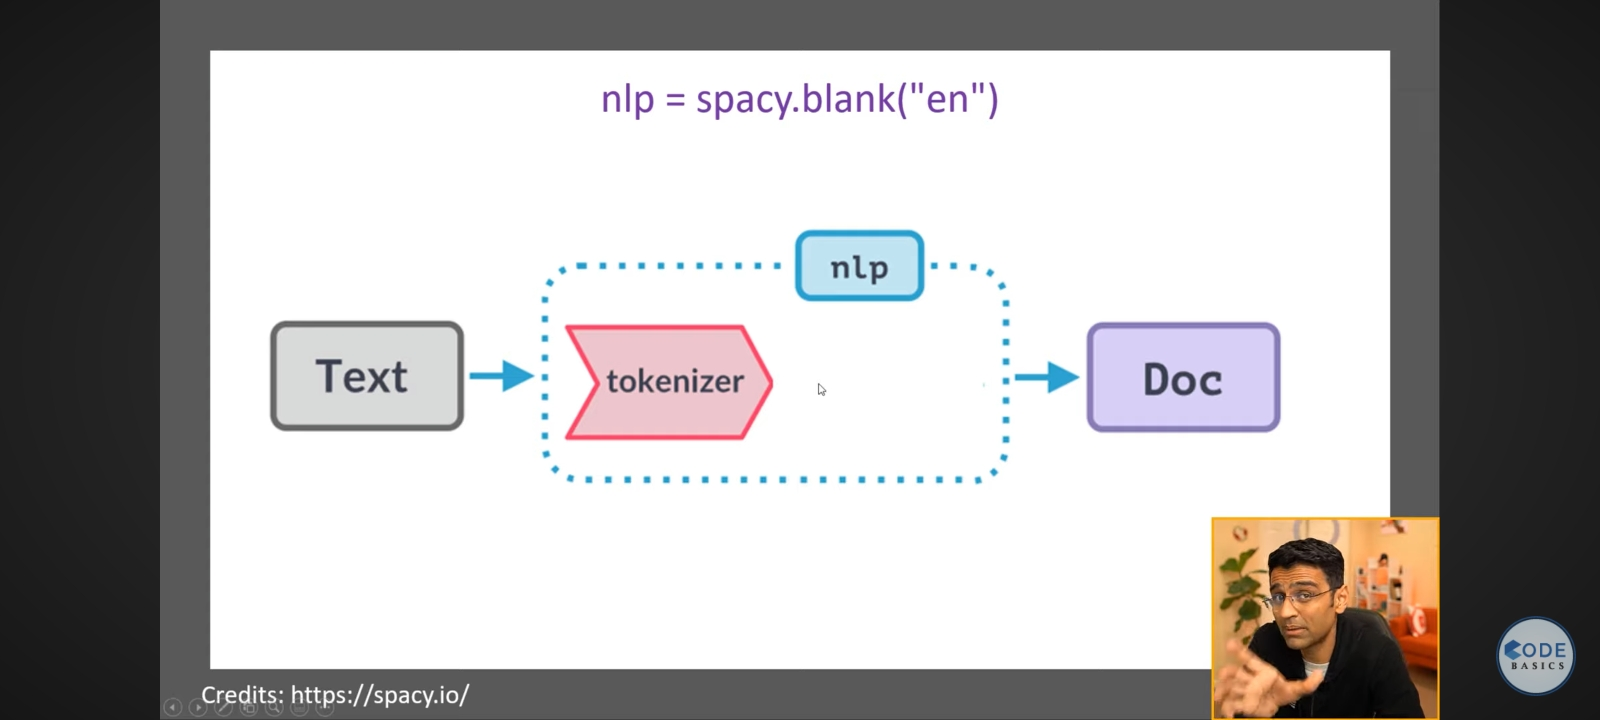

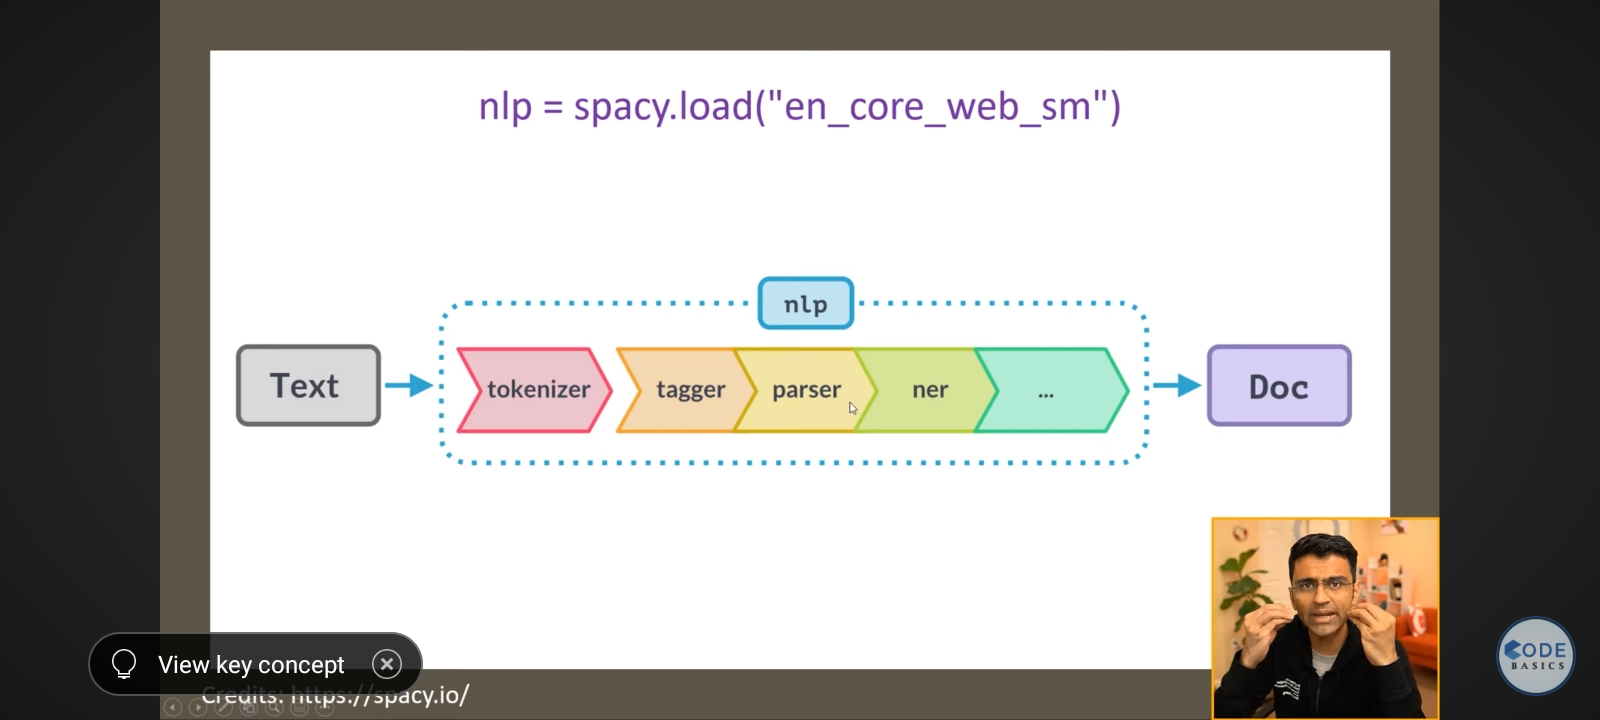

In [ ]:
# "doc" is also behave as list.
doc[0]

Dr.

Splitting the word by `spaces` vs `space tokenizer`.

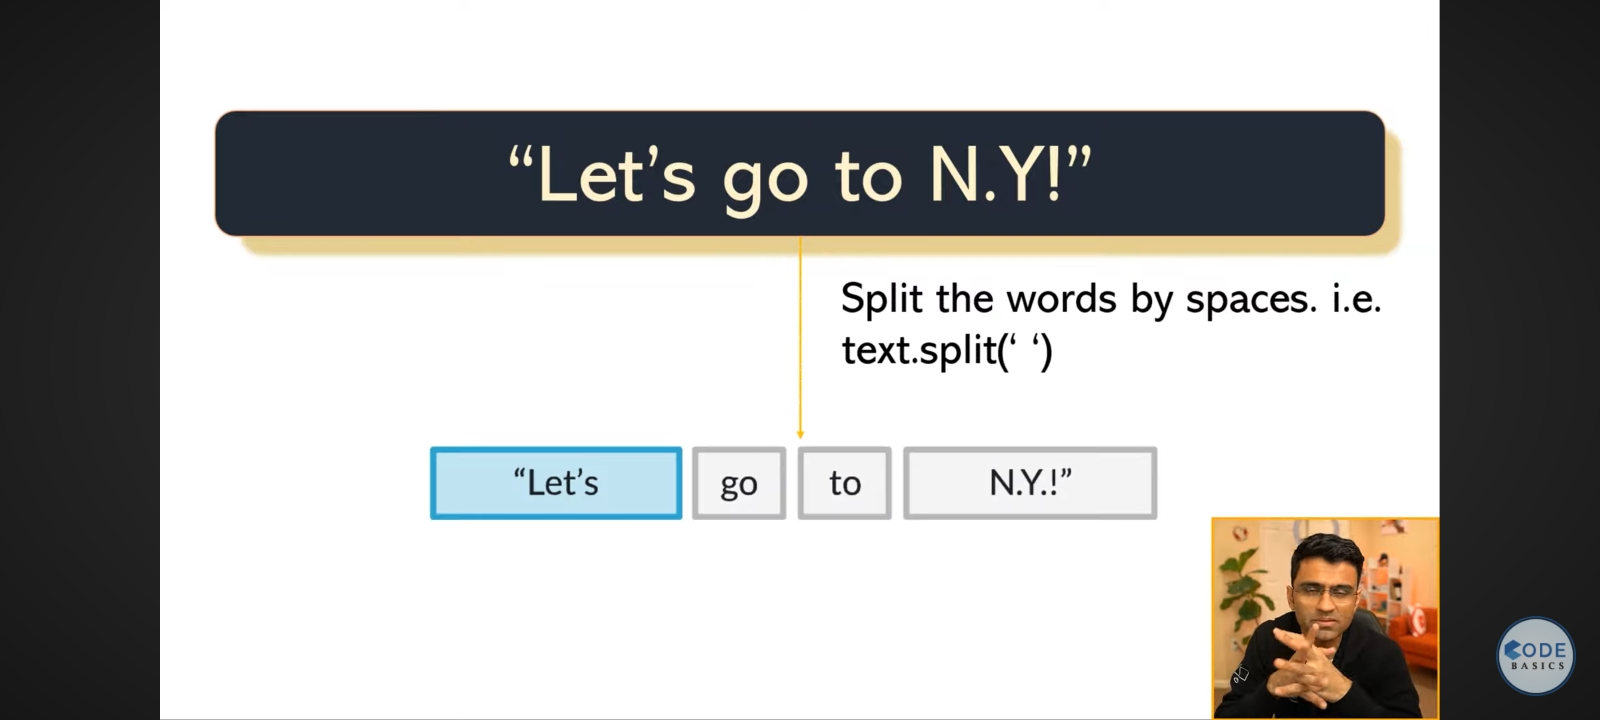

In [ ]:
text = '''"Let's go to N.Y.!"'''
text.split(' ')

['"Let\'s', 'go', 'to', 'N.Y.!"']

Space tokenizer

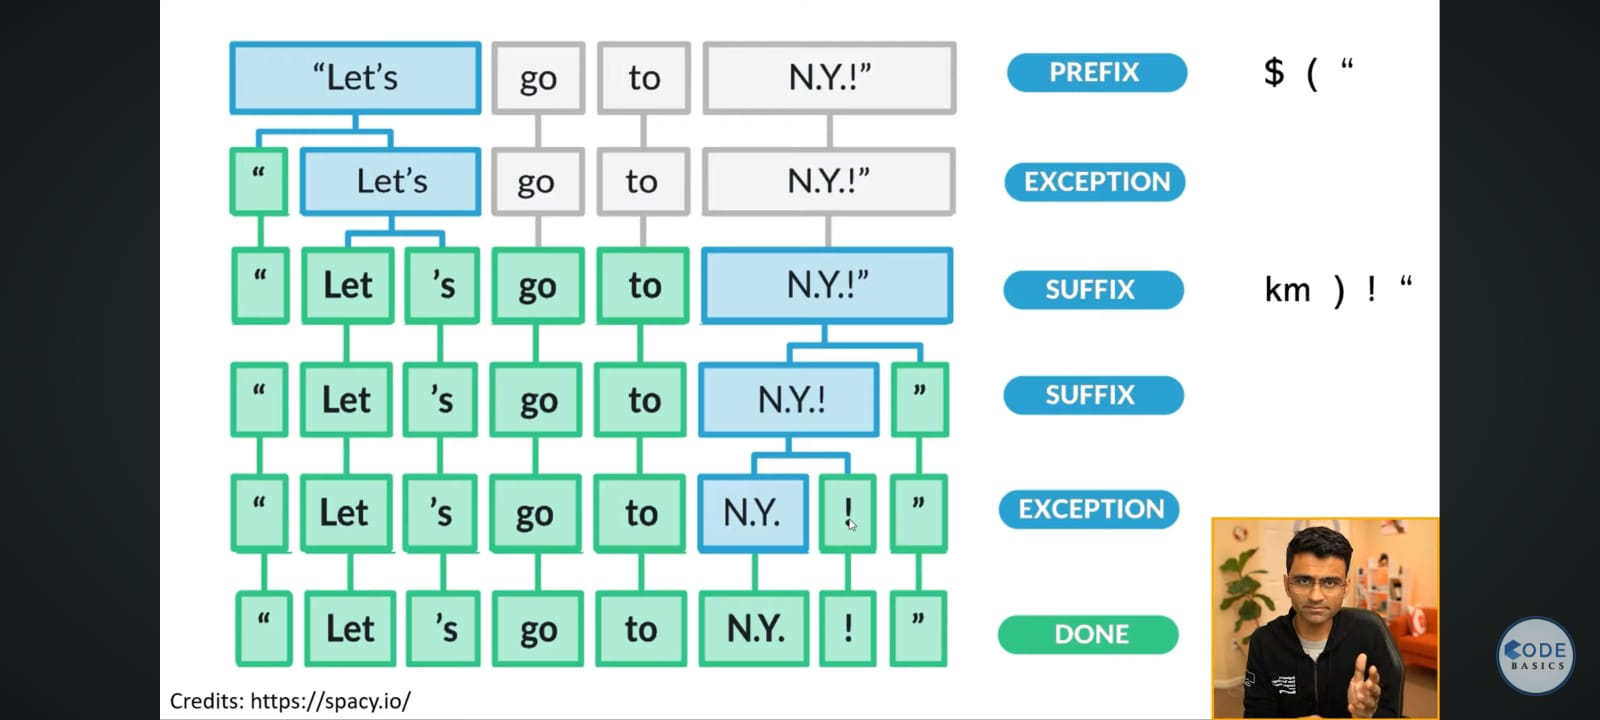

In [ ]:
doc = nlp('''"Let's go to N.Y.!"''')

for token in doc:
  print(token)

"
Let
's
go
to
N.Y.
!
"


In [ ]:
doc = nlp("Tony gave two $ to Peter.")

In [ ]:
token0 = doc[0]
token0

Tony

In [ ]:
type(token0) # "token0" is an object of class token.

spacy.tokens.token.Token

In [ ]:
# dir() functions gives all the functions present in that class.
dir(token0)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'le

In [ ]:
token0.is_alpha # "is_alpha"------------> is_alphabet.

True

In [ ]:
token0.like_num

False

In [ ]:
for token in doc:
  print(token, "==>", "index", token.i,
        "is_alpha:", token.is_alpha,
        "is_punct:", token.is_punct,
        "like_num:", token.like_num,
        "is_currency:", token.is_currency,)

Tony ==> index 0 is_alpha: True is_punct: False like_num: False is_currency: False
gave ==> index 1 is_alpha: True is_punct: False like_num: False is_currency: False
two ==> index 2 is_alpha: True is_punct: False like_num: True is_currency: False
$ ==> index 3 is_alpha: False is_punct: False like_num: False is_currency: True
to ==> index 4 is_alpha: True is_punct: False like_num: False is_currency: False
Peter ==> index 5 is_alpha: True is_punct: False like_num: False is_currency: False
. ==> index 6 is_alpha: False is_punct: True like_num: False is_currency: False


In [ ]:
# Reading the student.txt
with open("students.txt") as f:
  text = f.readlines()

In [ ]:
text

['Dayton high school, 8th grade students information\n',
 '==================================================\n',
 '\n',
 'Name\tbirth day   \temail\n',
 '-----\t------------\t------\n',
 'Virat   5 June, 1882    virat@kohli.com\n',
 'Maria\t12 April, 2001  maria@sharapova.com\n',
 'Serena  24 June, 1998   serena@williams.com \n',
 'Joe      1 May, 1997    joe@root.com\n',
 '\n',
 '\n',
 '\n']

In [ ]:
text = ' '.join(text)
text


'Dayton high school, 8th grade students information\n ==================================================\n \n Name\tbirth day   \temail\n -----\t------------\t------\n Virat   5 June, 1882    virat@kohli.com\n Maria\t12 April, 2001  maria@sharapova.com\n Serena  24 June, 1998   serena@williams.com \n Joe      1 May, 1997    joe@root.com\n \n \n \n'

In [ ]:
# extracting all the emails.
doc = nlp(text)
emails = []
for token in doc:
  if token.like_email:
    emails.append(token.text)

In [ ]:
emails

['virat@kohli.com',
 'maria@sharapova.com',
 'serena@williams.com',
 'joe@root.com']

# Hindi

In [ ]:
nlp = spacy.blank('hi')
doc = nlp("कैसे हो सब लोग, मै घर जा रहा हु।")
for token in doc:
  print(token)

कैसे
हो
सब
लोग
,
मै
घर
जा
रहा
हु
।


## using ORTH for special words.

In [ ]:
doc = nlp("gimme double cheese extra large healthy pizza.")

tokens = [tokens.text for tokens in doc]
tokens

['gimme', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza', '.']

In [ ]:
from spacy.symbols import ORTH

nlp.tokenizer.add_special_case("gimme", [
    {ORTH: "give"},
    {ORTH: "me"}
])

doc = nlp("gimme double cheese extra large healthy pizza.")

tokens = [tokens.text for tokens in doc]
tokens

ValueError: [E997] Tokenizer special cases are not allowed to modify the text. This would map 'gimme' to 'giveme' given token attributes '[{65: 'give'}, {65: 'me'}]'.

The `error` shows that, we can't modify the original text directly i.e we can't convert `gimme` to `give` and `me`. Instead we can perform splitting i.e. `gimme` can be converted to `gim` and `me`.

### Customizing tokenizer.

In [ ]:
from spacy.symbols import ORTH

nlp.tokenizer.add_special_case("gimme", [
    {ORTH: "gim"},
    {ORTH: "me"}
])

doc = nlp("gimme double cheese extra large healthy pizza.")

tokens = [tokens.text for tokens in doc]
tokens

['gim', 'me', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza', '.']

## Sentence tokenization or Segmentation

In [ ]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")
for sentence in doc.sents:
    print(sentence)

ValueError: [E030] Sentence boundaries unset. You can add the 'sentencizer' component to the pipeline with: `nlp.add_pipe('sentencizer')`. Alternatively, add the dependency parser or sentence recognizer, or set sentence boundaries by setting `doc[i].is_sent_start`.

The error showing that the nlp pipeline is blank.

In [ ]:
nlp.pipeline

[]

In [ ]:
# adding component to pipeline.
nlp.add_pipe('sentencizer')

In [ ]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")
for sentence in doc.sents:
    print(sentence)

Dr.
Strange loves pav bhaji of mumbai.
Hulk loves chat of delhi


## Exercise

### 1. Extract all the URLs.

In [ ]:
text='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/,
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

# TODO: Write code here
# Hint: token has an attribute that can be used to detect a url

doc = nlp(text)
urls = [token.text for token in doc if token.like_url== True]

In [ ]:
urls

['http://www.data.gov/',
 'http://www.science',
 'http://data.gov.uk/.',
 'http://www3.norc.org/gss+website/',
 'http://www.europeansocialsurvey.org/.']

### 2. Extract all money transaction from below sentence along with currency. Output should be,
- two $

- 500 €

In [ ]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"

# TODO: Write code here
# Hint: Use token.i for the index of a token and token.is_currency for currency symbol detection

doc = nlp(transactions)
for token in doc:
  if token.like_num and doc[token.i + 1].is_currency:
    print(token.text, doc[token.i+1].text)

500 €


## Language Processing pipeline.

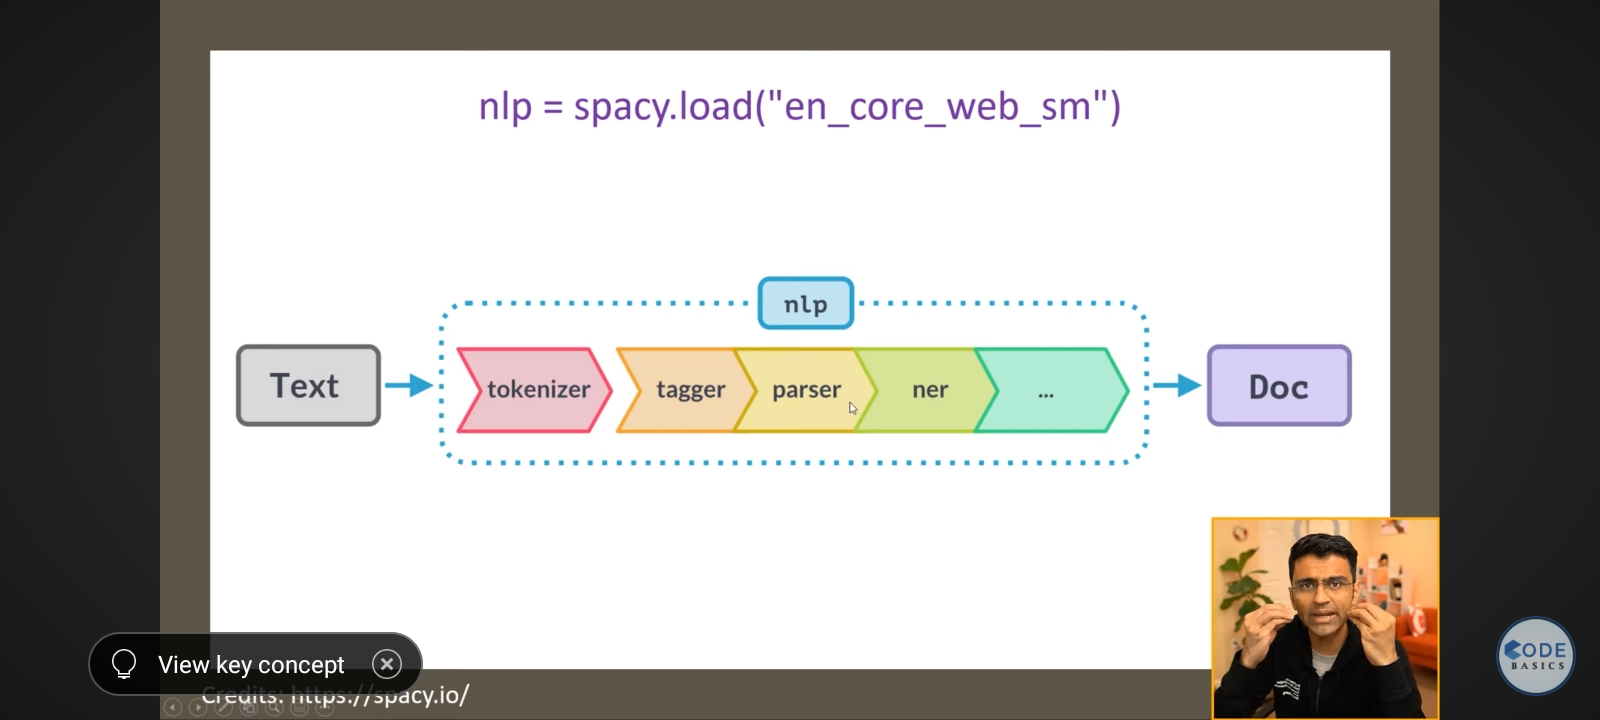

A pipeline is something that comes after tokenizer.

In [ ]:
import spacy

In [ ]:
nlp = spacy.blank('en') # blank language processing pipeline.

doc = nlp("Dr. Strange loves pav bhaji of mumbai as it costs only 2$ per plate.")

for token in doc:
  print(token)

Dr.
Strange
loves
pav
bhaji
of
mumbai
as
it
costs
only
2
$
per
plate
.


In [ ]:
nlp.pipe_names

[]

There are pretrained pipeline for each language which we can use.

In [ ]:
! python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 83.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('en_core_web_sm')

doc = nlp("Dr. Strange loves pav bhaji of mumbai as it costs only 2$ per plate.")

for token in doc:
  print(token)

Dr.
Strange
loves
pav
bhaji
of
mumbai
as
it
costs
only
2
$
per
plate
.


In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

Now there are number of pipeline components. This components can help to grab more details like "part of speech", "lemma" etc.

In [ ]:
for token in doc:
  print(token, " | ", token.pos_, " | ", token.lemma_) # "pos_"---->Part of speech and "lemma_"----------> lemmatization.

Dr.  |  PROPN  |  Dr.
Strange  |  PROPN  |  Strange
loves  |  VERB  |  love
pav  |  NOUN  |  pav
bhaji  |  NOUN  |  bhaji
of  |  ADP  |  of
mumbai  |  NOUN  |  mumbai
as  |  SCONJ  |  as
it  |  PRON  |  it
costs  |  VERB  |  cost
only  |  ADV  |  only
2  |  NUM  |  2
$  |  NUM  |  $
per  |  ADP  |  per
plate  |  NOUN  |  plate
.  |  PUNCT  |  .
